# Place for plotting stars and constellations for Ellison (Jandal)'s thesis book cover

In [24]:
import numpy as np
from numpy import *
from numpy import nan
# import os
import matplotlib.pyplot as plt
# import astropy
import pandas as pd
# from astropy.io import fits
# from astropy.table import Table
# from astropy.visualization import astropy_mpl_style
# from astropy.utils.data import get_pkg_data_filename
# import matplotlib as mpl
# from matplotlib import pyplot as plt
# from astropy.cosmology import WMAP9 as cosmo
# from astropy.cosmology import FlatLambdaCDM
# import astropy.units as u
# import matplotlib.gridspec as gridspec
# from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
#                                                   mark_inset)
# import matplotlib.cm as cm
# from scipy.stats import spearmanr

# plt.style.use(astropy_mpl_style)

import json

# Star data

In [25]:
# # # Ravi's path
# path = os.path.expanduser('~/Desktop/')
# stars=pd.read_csv(os.path.expanduser('/Desktop/stars-australia - Sheet1.csv'))

# # # Teresa's path
path = 'stars-australia-Sheet1.csv'
stars = pd.read_csv(path)
# stars #I've removed the brackets and nans from the original excel spreadsheet in order for this to work

In [ ]:
geometry = stars['geometry']

short2 = pd.DataFrame(columns=['Name']) 
short2
for i in range(len(geometry)):
    line = str(stars['geometry'][i]).split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)
short2=short2.drop(['Name'],axis=1)
short2

# Final dataframe for plotting etc - only extracting the important information
df = pd.DataFrame(stars[['name','mag','con','stories','role']])
df['RA'] = short2['B']
df['Dec'] = short2['C'] # adding RA and Dec
df = df[['name','RA','Dec','mag','con','stories','role']] # re-ordering columns; can leave this out
df

In [ ]:
# good point to wrap the co-ordinates seems to be 0deg (based on Ravi's plot below)
# df['RA'] = abs(pd.to_numeric(df['RA'])) # double check this?
df['RA'] = pd.to_numeric(df['RA'])
df['Dec'] = pd.to_numeric(df['Dec'])

df['RA'] = (df['RA'] + 360) % 360 # Wrapping RA co-ords so that RA is between 0 and 360 rather than +/-180

# Milky Way data - currently looking a bit stupid

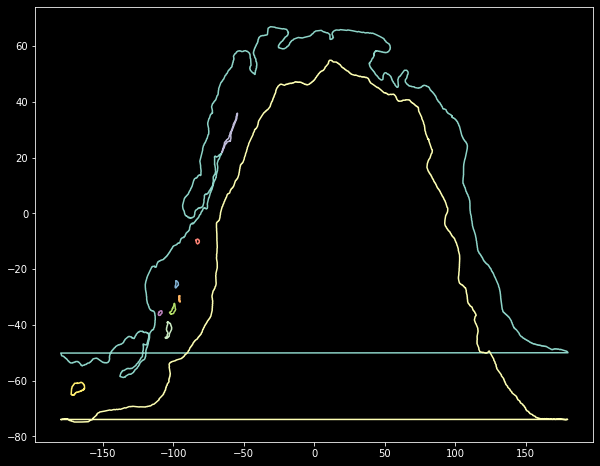

In [72]:
# Importing MW data based on the R blog:
# https://raw.githubusercontent.com/ofrohn/d3-celestial/master/data/mw.json

with open('mw.json','r') as f:
    data = json.loads(f.read())
    
mw_df = pd.json_normalize(data, record_path = ['features'])
mw_df

# print(mw_df.iloc[0][3])
test_array = np.array(mw_df.iloc[0][3][0], dtype=object)
test_array.shape

plt.figure(figsize=(10,8))
for t in test_array:
    t = np.array(t)

    ras = t[:,0]
    decs = t[:,1]

    plt.plot(ras, decs)
    
# looks like the data is missing some features 

# Plotting

In [ ]:
# Plotting

fig,ax = plt.subplots(1,1,figsize=(16,10)) # use (8,5) for smaller plot option
plt.style.use('dark_background') # temporary; to visualise the final plot
ax.scatter(df['RA'], df['Dec'], s=1/df['mag']*10) # marker size based on mag; todo need to re-scale!
plt.grid(False)

# Note: also the cluster around RA 50-100deg and the larger cluster (180-270deg) might need to be plotted 
#    separately at some point

# Ravi's code - old (for now, sorry!)

In [ ]:
sisters1=stars[stars['stories']=='sisters']
sisters2=stars[stars['stories']=='sisters, brothers, thoegay']
sisters3=stars[stars['stories']=='sisters, brothers']
sisters4=stars[stars['stories']=='sisters, thoegay']
sisters=pd.concat([sisters1,sisters2,sisters3,sisters4])
sisters
#An example of the constellations. The sisters constellation. We will need to make a new dataframe for each subset (brothers, thoegay, emu etc)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
ra = pd.to_numeric(short2['B'])
dec = pd.to_numeric(short2['C'])
mask1_sis = short2.index[sisters.index]
ra2 = ra[mask1_sis]
dec2 = dec[mask1_sis]
# print(ra2)
# ra = float(np.array(SED['B']))
# dec = float(SED['C'])
ax.scatter(ra,dec)
ax.scatter(ra2,dec2,c='yellow',marker='*')